<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/RPradata_HW2CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework:
- generate the samples (100, with different sizes) from 5 different distributions.
- plot the sample mean against sample size N
- describe the behavior (LLN)
- plot distributions of sample means as histogram
- fit a gaussian




Following the code skeleton from Prof. Bianco

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


In [ ]:
import numpy as np
np.__version__

'1.23.5'

# 1. Chi-Square distribution.


In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [ ]:
mymean = 100

In [ ]:
#then create distribution
#first try chi-sq, as in skeleton notebook
df = mymean

First, trying out how to generate a sample. Taking size 100.

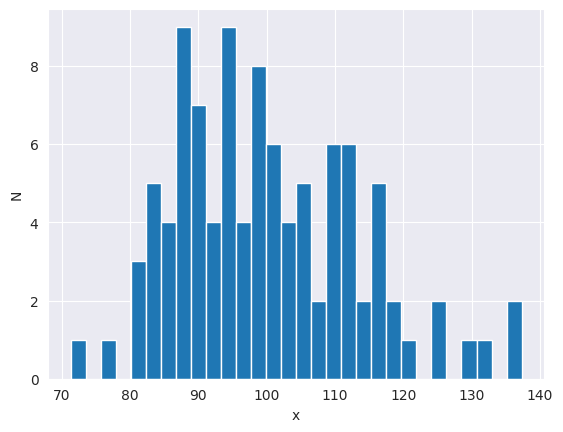

In [ ]:
#now making dictionary to host distributions

import numpy as np
np.random.seed(456)  #https://www.geeksforgeeks.org/random-seed-in-python/

#in the dictionary, each family of distribution is called as a "key"
mydists = {} #it's still empty
mydists['chisq'] = {} #this is now an element of the dictionary, itself also being a dict
mydists['chisq'][100] = np.random.chisquare(df, size=100)
#btw other distributions: can use scipy.stats
#mydists now has one object: a dictionary by key "chisq"
#and further, this dictionary has one object in it: array of 100 elements by key "100"


pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


#then we have chi sq distribution of a sample size 100
#for a chi sqdistribution with 100 df




Fig. 1: Histogram of the values of the distribution (x-axis) and the frequency of occurence (y-axis). In our chi-squared distribution, we have df = 100, which is also defined to be the mean.

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


Now, we generate 100 samples of the distribution, with varying sample sizes.

In [ ]:
#now making 100 chi sq distributions (want 100 samples, with varying sample sizes)

#mysize = (np.random.rand(100) * 1000).astype(int) #the sizes
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)


print(mysize)
print("We will have ",len(mysize), " samples.")



[   10    10    11    12    13    14    15    17    18    19    21    23
    25    27    29    31    34    36    39    42    46    50    54    58
    63    68    73    79    85    92   100   107   116   125   135   146
   158   171   184   199   215   232   251   271   292   316   341   368
   398   429   464   501   541   584   630   681   735   794   857   926
  1000  1079  1165  1258  1359  1467  1584  1711  1847  1995  2154  2326
  2511  2712  2928  3162  3414  3686  3981  4298  4641  5011  5411  5843
  6309  6812  7356  7943  8576  9261 10000 10797 11659 12589 13593 14677
 15848 17113 18478 19952]
We will have  100  samples.


Text(0, 0.5, 'frequency')

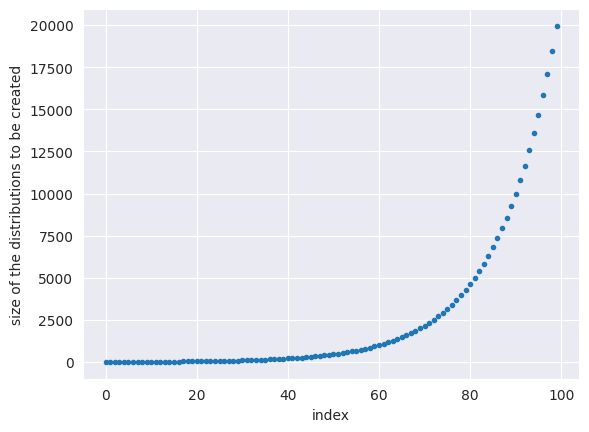

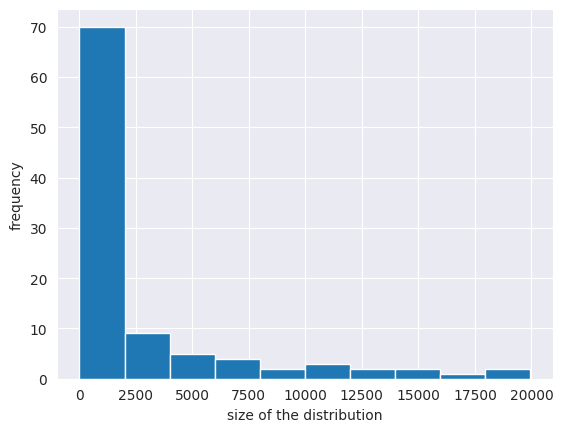

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")

Fig. 2. Top: Shows the indices of the array "mysize" with the corresponding sample sizes to be set. Bottom: A histogram showing the frequency of specified sample sizes.

Now we want to plot the sample mean of each sample against the sample size N.

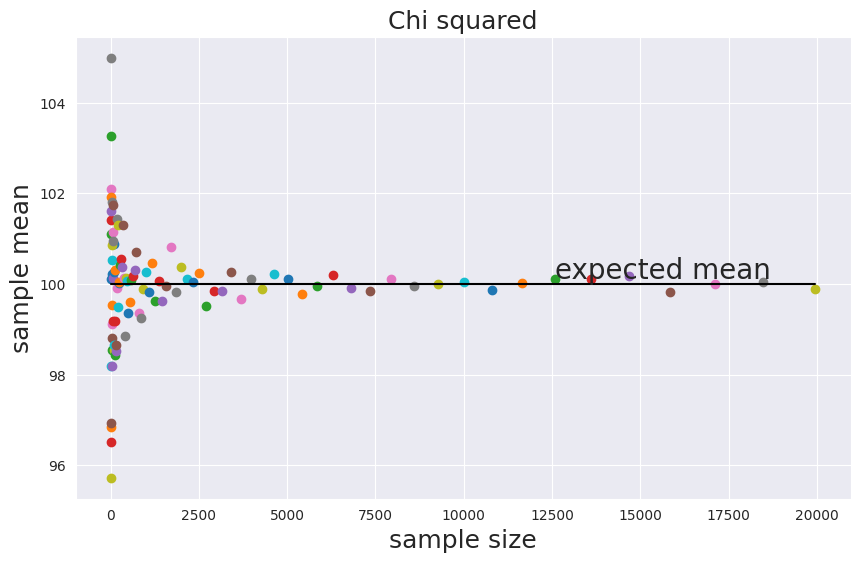

In [ ]:
for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

#^so this is for generating all the samples.

# (save the means for plotting later)

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

Fig. 3: A scatterplot of the sample size with respect to the sample mean. The horizontal black line at sample mean = 100 shows the population mean.

As the sample size increases, we see that the scatterplot approaches the value of the expected mean (population mean). This matches what is said in the Law of Large Numbers, where as the sample size gets large (approaches infinity), the sample mean converges to the population mean.

Now plotting the distribution of the sample means as a histogram.


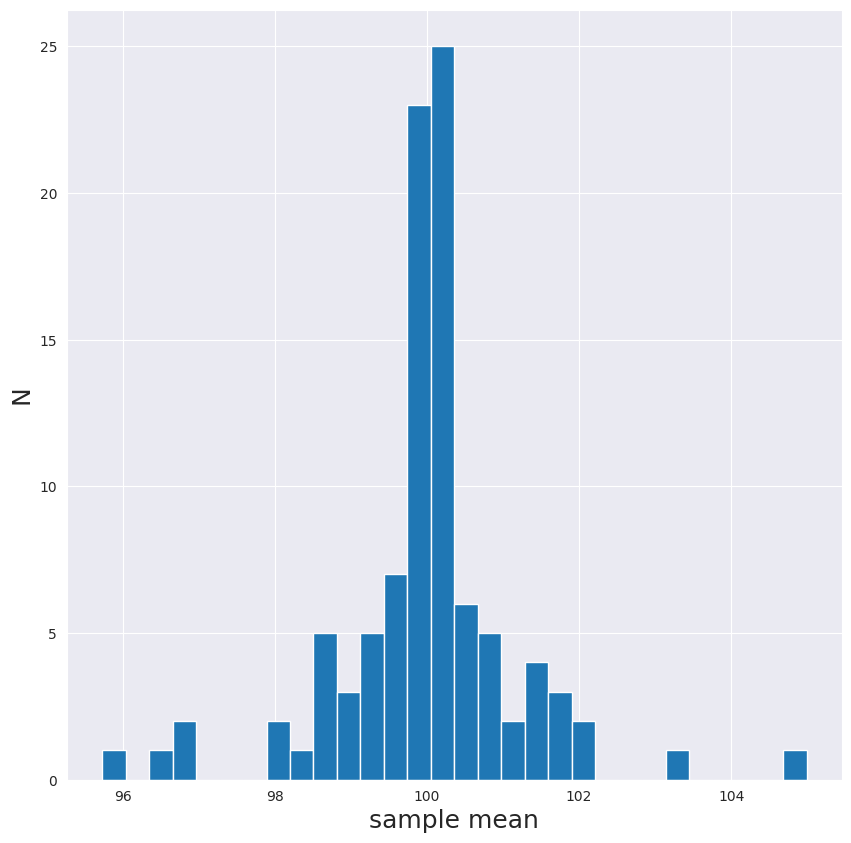

In [ ]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

Fig. 4: Histogram showing the distribution of sample mean value. The plot seems to approach a Gaussian shape, which we are going to fit next. In Fig. 3, we pointed out how the Law of Large numbers applies, and here it can be seen how most of sample mean values tend to center at 100.

Fitting Gaussiang (Chi-squared)

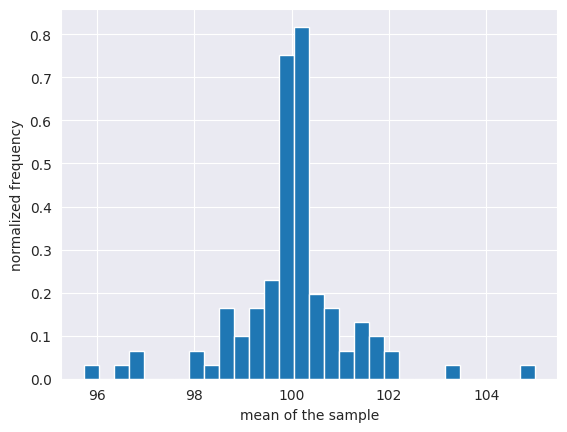

In [ ]:
#create a Gaussian function to pass to curve_fit

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");



Fig. 5: A histogram like that shown in fig. 4, yet with normalized frequencies on the y-axis.

In [ ]:
#defining gaussian function to input to the sc.optimize.curve_fit function

import scipy as sc

def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  # '''
opt = sc.optimize.curve_fit(gaussian, bins[:-1], height, p0=[100, 10])

#gaussian-fitted mean and SD are in matrix elmnt [0,0] and [0,1].

#we have bins[:-1] as our x (cutting out last value), because it automatically
#evaluates the right end of the histogram too, while for the rest of the bins it evalutes the left ones.
#so there is one extra point. that's why dimensions aren't the same.

#p0 are the "guess" values for mean and standard deviation

print("Mean of the Gaussian-fitted sample mean distribution: ", opt[0][0])
print("Variance of the Gaussian-fitted sample mean distribution: ", opt[0][1])

Mean of the Gaussian-fitted sample mean distribution:  99.89312045407992
Variance of the Gaussian-fitted sample mean distribution:  0.4954956409657769


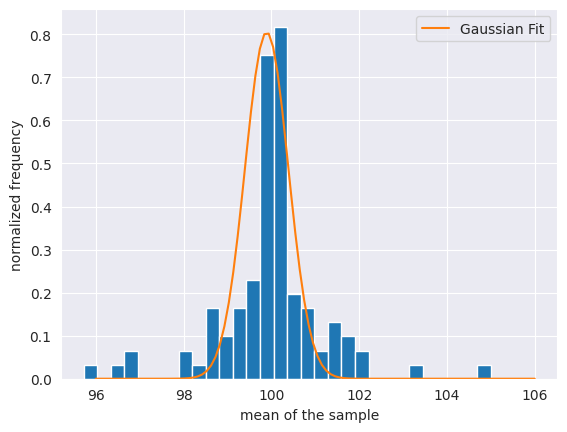

In [ ]:
#creating the fit plot on the histogram

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")

x = np.linspace(96, 106, num=100)
y = gaussian(x, opt[0][0], opt[0][1])

#we use np.linspace as the x so that it has more points to evaluate from
#unlike having the bins as x

pl.plot(x, y, label="Gaussian Fit")

pl.legend()
pl.show()

Fig. 6: (Normalized) histogram of the sample mean value distribution, fitted with a Gaussian curve. The fitted curve and the histogram seems to show a steep peak around the mean value ~ 100.



Seen in Fig. 6, as the sample size approches large numbers, the distributions approaches a Gaussian shape, and the sample mean approaches a Normal distribution. The Fitted Gaussian mean was ~ 99.89, as computed previously, and is also seen in the figure. This is very close to the population mean, at 100. Therefore, this shows that the Central Limit Theorem holds.

# 2. Poisson Distribution

Poisson mean: 99.90, standard deviation: 10.46


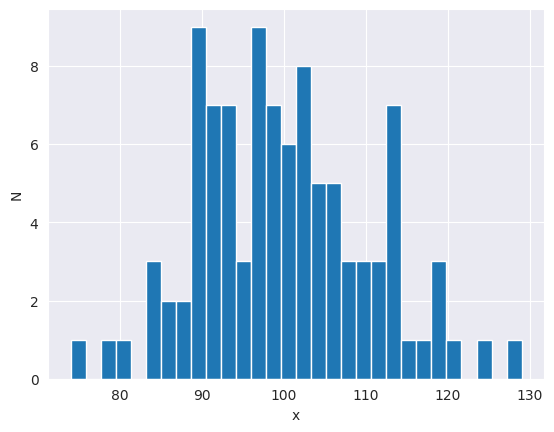

In [ ]:
from numpy.linalg.linalg import multi_dot
#now do the same thing for other distributions...

import scipy as sc

#poisson distribution:

distributions = ['pois']

#depends on parameter mu, which also happens to be the mean
mu_ = mymean

np.random.seed(456)

mydists['pois'] = {}
mydists['pois'][100] = sc.stats.poisson.rvs(mu_, size=100)

# sc.stats.poisson.rvs(mu_, size=100)
# sc.stats.poisson.pmf(k=1,mu=mu_, size=100)

pl.hist(mydists['pois'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


#^so that is an example for sample size 100.

print ("Poisson mean: %.2f, standard deviation: %.2f"%(mydists['pois'][100].mean(), mydists['pois'][100].std()))






Fig. 7: Histogram of the values of the Poisson distribution with parameter mu = 100 (x-axis) and the frequency of occurence (y-axis). The mean and standard deviation of our generated sample are also computed.

In [ ]:
#now we want to make 100 samples, with varying sample sizes

mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)

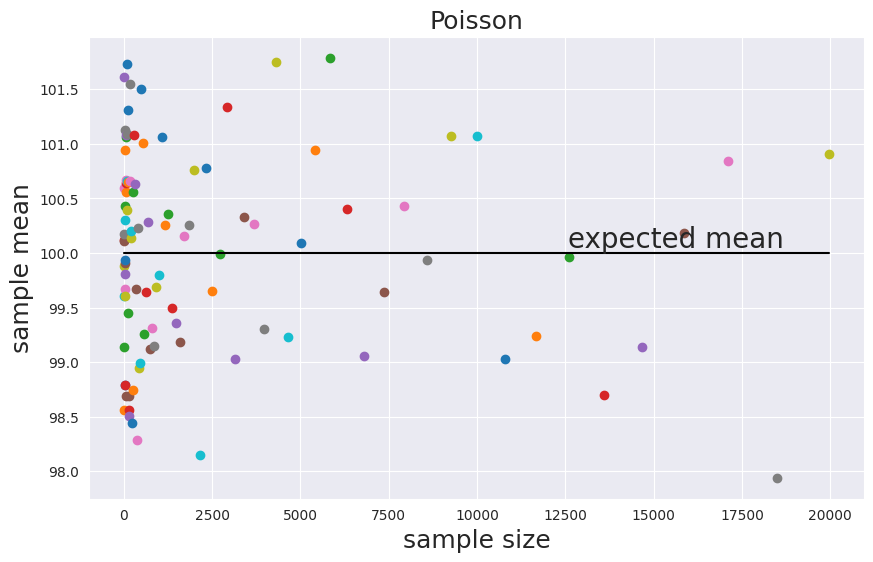

In [ ]:
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['pois'][n] = sc.stats.poisson.rvs(mymean, size=100)
    # print(mydists['pois'][n])

#save the means for plotting later

mydists['pois']['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['pois']:
  # if type(nn)==str:
  #   print(nn) #would print "means".
    #the [n] in prev lines indicate the sample size; hence the distribution with that said size, as the object.

    if not type(nn) == str: # needed because one element is "mean"
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        #^this is to store all the sample means, which are asked for.

#         #and plot it
        axpois_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('Poisson', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean], 'k')
#this prints the horizontal line that indicates the population mean throughout.
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

Fig. 8: 100 samples of different sizes (based on the the array "mysize") of a Poisson distribution with the same parameter mu = 100.

The Law of Large Numbers may be less obvious in this distribution, compared to the previous Chi-squared graph. As the sample size increases, the scatterplots seem to have a slight tendency to gather in the middle, yet there are some outliers, such as the grey dot at around n=18000. For this distribution, it might need to take a larger sample size for it to converge to the population mean.

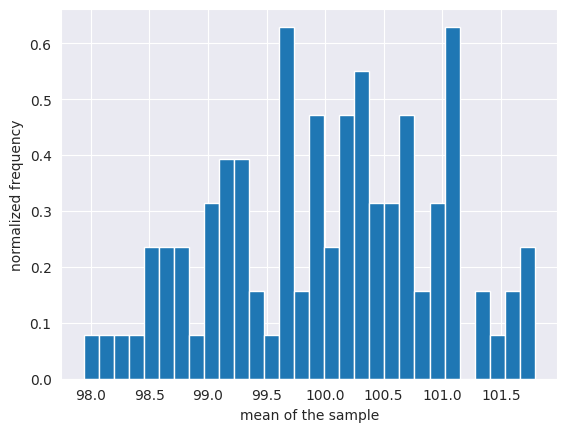

In [ ]:
allmeans = list(mydists['pois']['means'].values())


height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

Fig. 9: Normalized histogram showing the distribution of sample mean values for the Poisson dsitributions with population mean 100.

In [ ]:

def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  # '''
opt = sc.optimize.curve_fit(gaussian, bins[:-1], height, p0=[100, 10])


print("Mean of the Gaussian-fitted sample mean distribution: ", opt[0][0])
print("Variance of the Gaussian-fitted sample mean distribution: ", opt[0][1])

Mean of the Gaussian-fitted sample mean distribution:  100.03862928296392
Variance of the Gaussian-fitted sample mean distribution:  1.0555927621990082


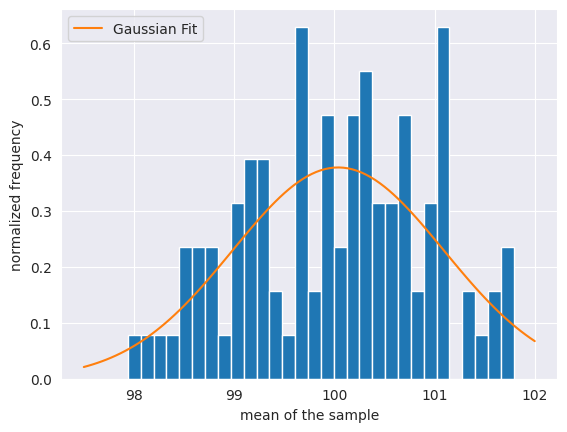

In [ ]:
#creating the fit plot on the histogram

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")

x = np.linspace(97.5, 102, num=100)
y = gaussian(x, opt[0][0], opt[0][1])

#we use np.linspace as the x so that it has more points to evaluate from
#unlike having the bins as x

pl.plot(x, y, label="Gaussian Fit")

pl.legend()
pl.show()

Fig. 10: Normalized histogram of the Poisson sample mean distribution, fitted with a Gaussian curve with mean as computed.

Compared to the histogram and fit curve for the Chi-squared distribution, the values seem to be more spread out (less steep around the population mean value). This makes sense because in Fig. 8, the scatterplots did not seem to converge as strongly towards the "expected" mean value as the chi-squared.

However, we were still able to clearly fit a Gaussian plot on this distribution, showing that the CLT still applies well.

# 3. Gaussian

In [ ]:
#now for gaussian/normal

distributions = ['gaus']


#Gaussian mean is mu

Gaus mean: 100.14, standard deviation: 0.92


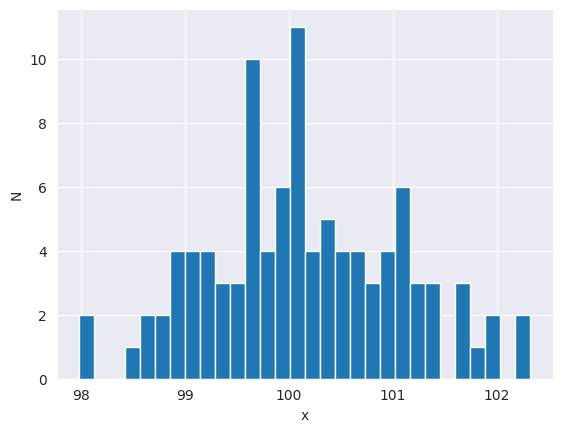

In [ ]:

np.random.seed(456)

mydists['gaus'] = {}

mydists['gaus'][100] = sc.stats.norm.rvs(loc = mymean, size=100) #loc specifies mean

pl.hist(mydists['gaus'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

print ("Gaus mean: %.2f, standard deviation: %.2f"%(mydists['gaus'][100].mean(), mydists['gaus'][100].std()))

Fig. 11: Histogram of the Gaussian distribution value (x-axis) and the frequency of occurence (y-axis). The mean and standard deviation of our generated sample are also computed.

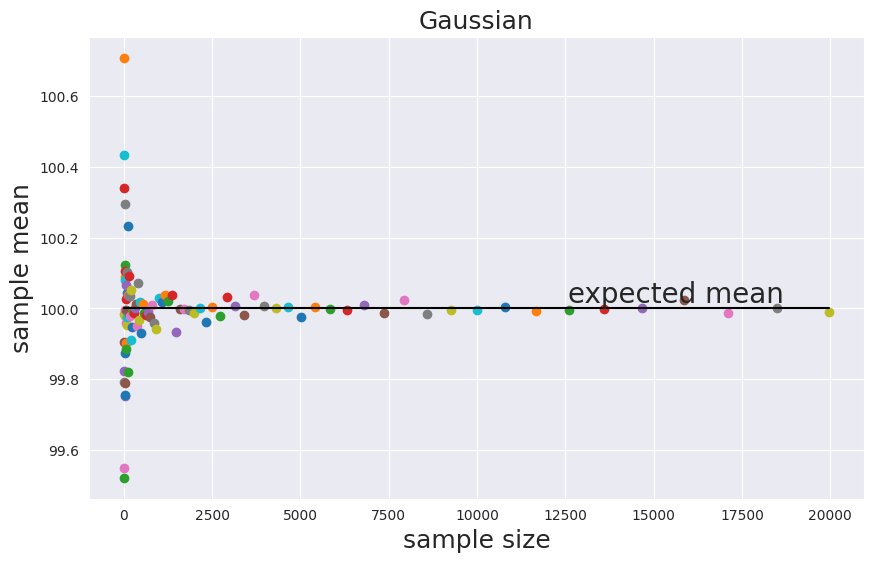

In [ ]:
#now doing for 100 of these distributions

#having mysize as we had for previous distributions...
#and we want to have same population mean

for n in mysize:
    mydists['gaus'][n] = sc.stats.norm.rvs(loc=mymean, size=n)

# save the means for plotting later

mydists['gaus']['means'] = {}
# prepare the figure
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['gaus']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['gaus']['means'][nn] = mydists['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, mydists['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
axgaus_mu_n.set_title('Gaussian', fontsize=18)
axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axgaus_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

Fig. 12: 100 samples of different sizes (based on the the array "mysize") of the generated Gaussian distributions. The population mean is marked by the horizontal line at sample mean = 100 (at the y-axis).

The means of the Gaussian sample distributions strongly converge to the expected/population mean as the sample size increases, and this seems to be a stronger trend than that of the Chi-squared distribution.

Text(0.5, 1.0, 'Gaussian')

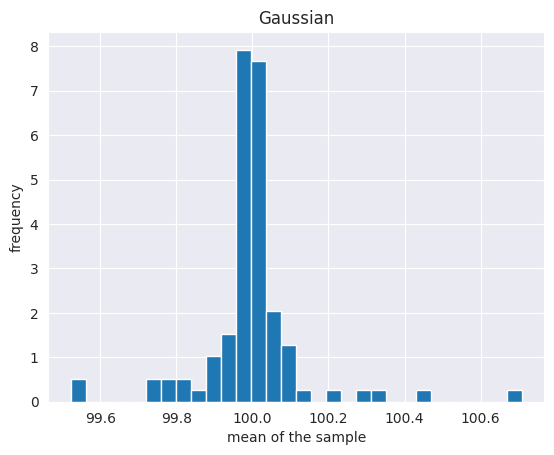

In [ ]:
#now histogram
allmeans = list(mydists['gaus']['means'].values())


height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("frequency");

pl.title("Gaussian")


Fig. 13: Histogram showing the distribution of sample mean values for the Poisson dsitributions with population mean 100.

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  # '''
opt = sc.optimize.curve_fit(gaussian, bins[:-1], height, p0=[100, 10])


print("Mean of the Gaussian-fitted sample mean distribution: ", opt[0][0])
print("Variance of the Gaussian-fitted sample mean distribution: ", opt[0][1])

Mean of the Gaussian-fitted sample mean distribution:  99.97749489845538
Variance of the Gaussian-fitted sample mean distribution:  0.04234450171814667


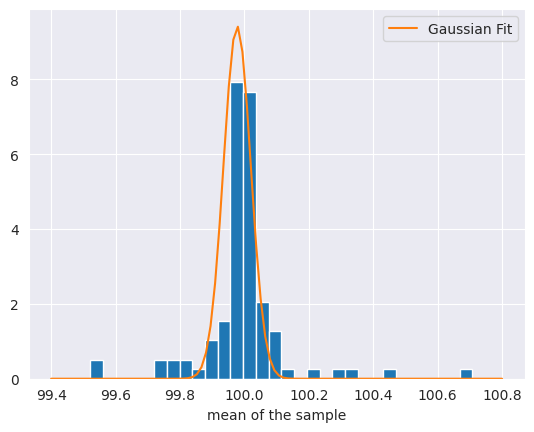

In [ ]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
# pl.ylabel("frequency")

x = np.linspace(99.4, 100.8, num=100)
y = gaussian(x, opt[0][0], opt[0][1])

#we use np.linspace as the x so that it has more points to evaluate from
#unlike having the bins as x

pl.plot(x, y, label="Gaussian Fit")

pl.legend()
pl.show()

Fig. 14: Histogram of the Gaussian sample mean distribution, fitted with a Gaussian curve.

The histogram and fitted Gaussian curve show a steep peak also around the expected mean value ~ 100. The convergence in this distribution seem to be more concentrated towards the mean than that in the chi-squared as it has a smaler range around it (~mean 99.5-100.5 compared to chi-squared with mean range ~ 96-105).

## 4. Binomial distribution

In [ ]:
distributions = ['binomial']

#binomial mean is np.
#so in the binom function, we want to set n and p as combinations that multiply to mymean = 100.

Binomial mean: 99.86, standard deviation: 6.33


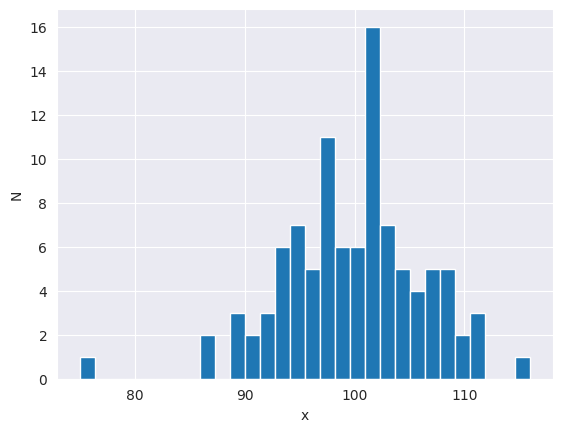

In [ ]:
import numpy as np
np.random.seed(603)
mydists = {}
mydists['binomial'] = {}
mymean = 100

mydists['binomial'][100] = sc.stats.binom.rvs(200,0.5, size=100)

pl.hist(mydists['binomial'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

print ("Binomial mean: %.2f, standard deviation: %.2f"%(mydists['binomial'][100].mean(), mydists['binomial'][100].std()))



Fig. 15: Histogram of the Binomial distribution value with mean = np = 100 (x-axis) and the frequency of occurence (y-axis). The mean and standard deviation of our generated sample are also computed.

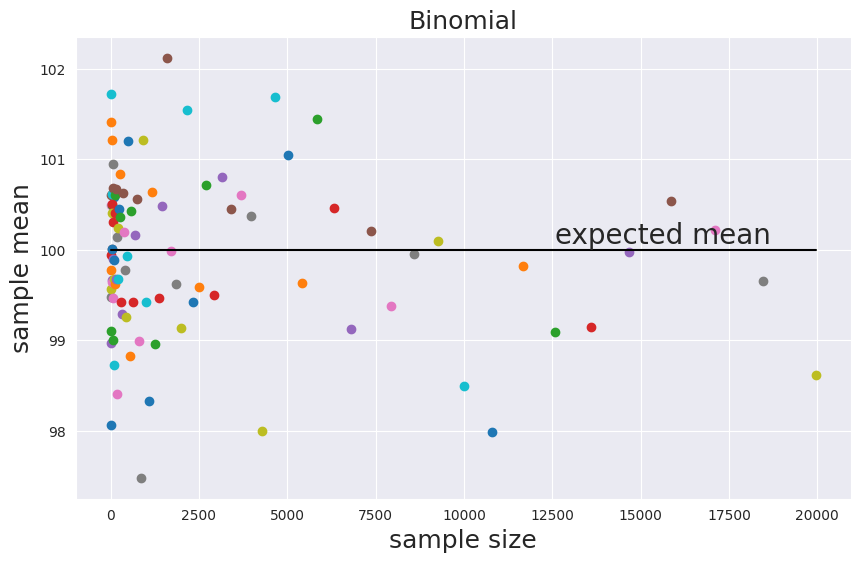

In [ ]:
for n in mysize:
    mydists['binomial'][n] = sc.stats.binom.rvs(200,0.5, size=100)
    # print(mydists['pois'][n])

#save the means for plotting later

mydists['binomial']['means'] = {}
# prepare the figure
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binomial']:
  # if type(nn)==str:
  #   print(nn) #would print "means".
    #the [n] in prev lines indicate the sample size; hence the distribution with that said size, as the object.

    if not type(nn) == str: # needed because one element is "mean"
        mydists['binomial']['means'][nn] = mydists['binomial'][nn].mean()
        #^this is to store all the sample means, which are asked for.

#         #and plot it
        axbinom_mu_n.plot(nn, mydists['binomial']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
axbinom_mu_n.set_title('Binomial', fontsize=18)
axbinom_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean], 'k')
#this prints the horizontal line that indicates the population mean throughout.
axbinom_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

Fig. 16: 100 samples of different sizes (based on the the array "mysize") of the Binomial distributions with n*p = 100. The population mean is marked by the horizontal line at sample mean = 100 (at the y-axis).

Although not as strongly as the chi-squared or gaussian distribution samples, the binomial distribution samples seem still converge towards the expected mean as the sample size gets large. The convergence does seem to be sharper than that of the poisson distribution.

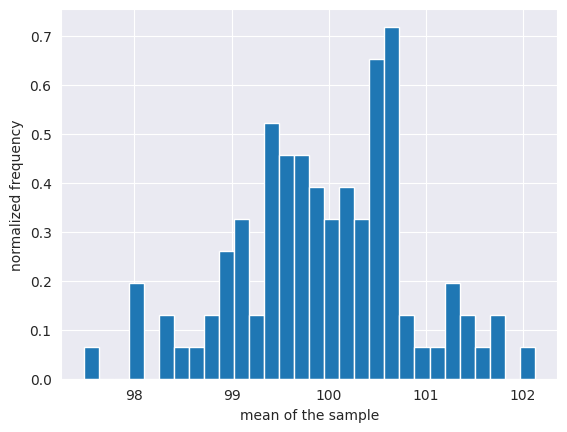

In [ ]:
allmeans = list(mydists['binomial']['means'].values())


height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

Fig. 17: Normalized histogram showing the distribution of sample mean values for the Binomial dsitributions with n*p = 100.

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  # '''
opt = sc.optimize.curve_fit(gaussian, bins[:-1], height, p0=[100, 10])


print("Mean of the Gaussian-fitted sample mean distribution: ", opt[0][0])
print("Variance of the Gaussian-fitted sample mean distribution: ", opt[0][1])

Mean of the Gaussian-fitted sample mean distribution:  99.92828059823174
Variance of the Gaussian-fitted sample mean distribution:  0.8571675492366959


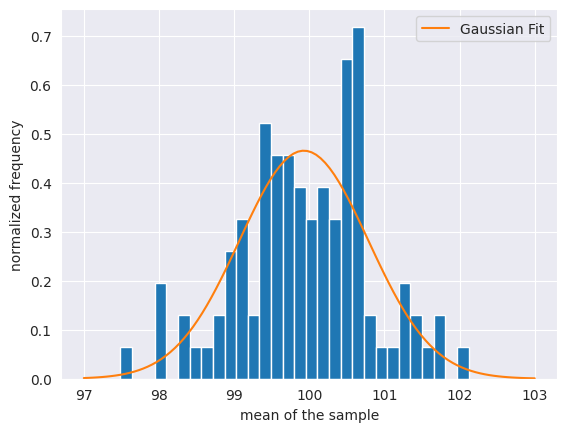

In [ ]:
#creating the fit plot on the histogram

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")

x = np.linspace(97, 103, num=100)
y = gaussian(x, opt[0][0], opt[0][1])

#we use np.linspace as the x so that it has more points to evaluate from
#unlike having the bins as x

pl.plot(x, y, label="Gaussian Fit")

pl.legend()
pl.show()

Fig. 18: Normalized histogram of the Binomial sample mean distribution, fitted with a Gaussian curve.


The sample distribution means tend to resemble a Gaussian, and is made clearer after curve-fitted with the Gaussian fit, in which the mean we computed. This shows the CLT applies.

# 5. Cauchy distribution

In [ ]:
distributions = ['cauchy']

#note that Cauchy has no well-defined mean.

#so what we can do is set loc=100



Cauchy mean: 102.99, standard deviation: 22.77


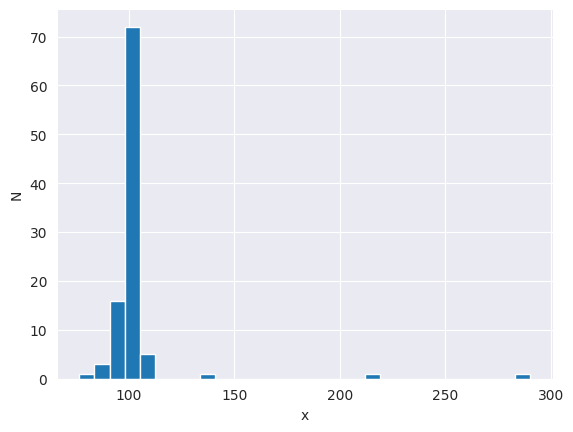

In [ ]:
np.random.seed(603)
mydists = {}

mydists['cauchy'] = {}

mydists['cauchy'][100] = sc.stats.cauchy.rvs(loc=mymean, size=100)

pl.hist(mydists['cauchy'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

print ("Cauchy mean: %.2f, standard deviation: %.2f"%(mydists['cauchy'][100].mean(), mydists['cauchy'][100].std()))

Fig. 19: Histogram of the Cauchy distribution value at loc=10 (x-axis) and the frequency of occurence (y-axis). The mean and standard deviation of our generated sample are also computed.

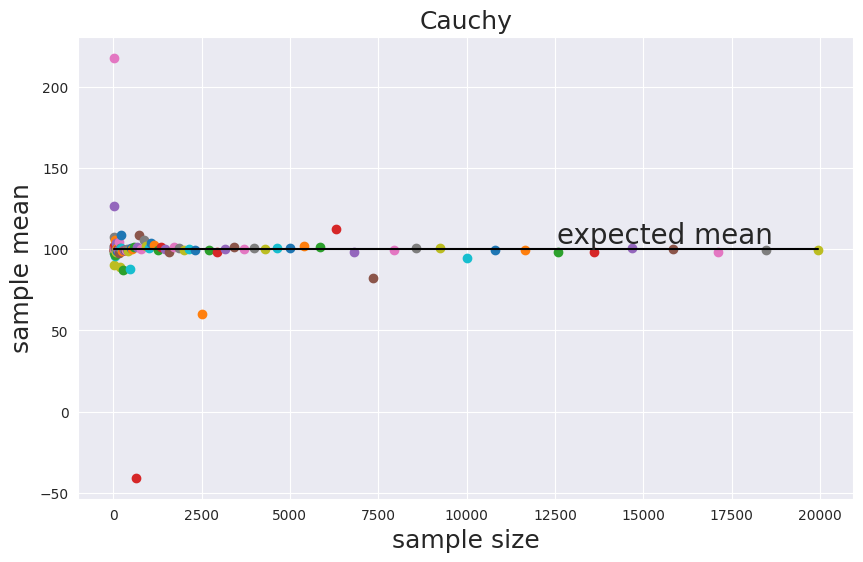

In [ ]:
for n in mysize:
    mydists['cauchy'][n] = sc.stats.cauchy.rvs(loc=mymean, size=100)


mydists['cauchy']['means'] = {}
# prepare the figure
axcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['cauchy']:
  # if type(nn)==str:
  #   print(nn) #would print "means".
    #the [n] in prev lines indicate the sample size; hence the distribution with that said size, as the object.

    if not type(nn) == str: # needed because one element is "mean"
        mydists['cauchy']['means'][nn] = mydists['cauchy'][nn].mean()
        #^this is to store all the sample means, which are asked for.

#         #and plot it
        axcauchy_mu_n.plot(nn, mydists['cauchy']['means'][nn], 'o')
        axcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
axcauchy_mu_n.set_title('Cauchy', fontsize=18)
axcauchy_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean], 'k')
#this prints the horizontal line that indicates the population mean throughout.
axcauchy_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

Fig. 20: 100 samples of different sizes (based on the the array "mysize") of the generated Cauchy distributions plotted against each sample mean.

The Cauchy distribution sample means seem to very much gather near the expected mean, even from small sample sizes. Though, it can still be seen that the few "outliers" narrow closer to the expected mean as the size increases. Hence, qualitatively from this graph, the Law of Large Numbers can still apply, despite the distribution not having a defined mean.


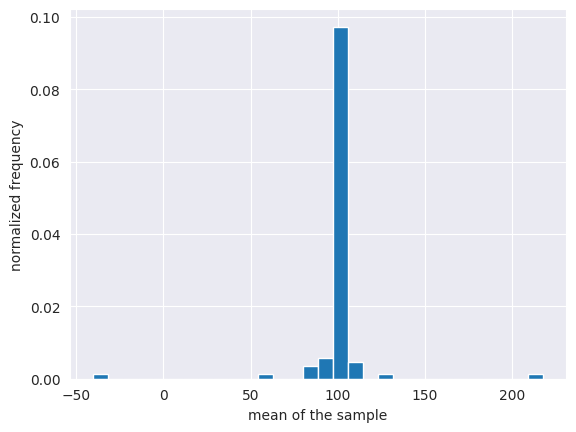

In [ ]:
allmeans = list(mydists['cauchy']['means'].values())


height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

Fig. 21: Normalized histogram showing the distribution of sample mean values for the Cauchy dsitributions.

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  # '''
opt = sc.optimize.curve_fit(gaussian, bins[:-1], height, p0=[100, 10])


print("Mean of the Gaussian-fitted sample mean distribution: ", opt[0][0])
print("Variance of the Gaussian-fitted sample mean distribution: ", opt[0][1])

Mean of the Gaussian-fitted sample mean distribution:  94.75735577799297
Variance of the Gaussian-fitted sample mean distribution:  2.367820993939495


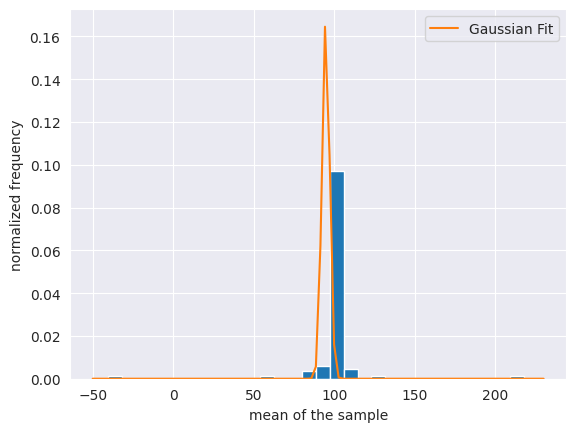

In [ ]:
#creating the fit plot on the histogram

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")

x = np.linspace(-50, 230, num=100)
y = gaussian(x, opt[0][0], opt[0][1])

#we use np.linspace as the x so that it has more points to evaluate from
#unlike having the bins as x

pl.plot(x, y, label="Gaussian Fit")

pl.legend()
pl.show()

Fig. 22: Normalized histogram of the Cauchy sample mean distribution, fitted with a Gaussian curve.

Because the "sample means" are already seen to strongly gather around the expected mean (at 100) in Fig. 20, the histogram and Gaussian curve fit strongly peak around this value. As mentioned too, there are a few outliers especially at around -40 and 230, yet as the sample size increases, these outliers converge closer towards ~ 100. The histogram still forms a gaussian around the expected mean, hence the CLT applies.

## Conclusion

The Law of Large Numbers states that when independent random variables with the same underlying distribution have the same mean (and standard deviation), the mean of these values will approach that said "expected" mean as the sample size goes to the limit of large numbers. This is evident in all of the distributions we demonstrated, though some converge stronger than others.

Ths leads us to the Central Limit Theorem, which states thatin the limit of the sample size to infinity, the distribution of the sample means would approach a Gaussian distribution. Qualitatively, this has been quite apparent just by the histograms we plotted for the distributions. However, this becomes more evident as we curve fit a Gaussian curve to them, and further compute how the mean of the fitted curve would be very near to the "expected mean", which we set to be 100. The means of most of the distribution curve-fits were within +/-~0.3% of the expected mean.